In [31]:
from captcha.image import ImageCaptcha

In [32]:
import matplotlib.pyplot as plt

In [33]:
import numpy as np
import random

In [34]:
%matplotlib inline

In [35]:
import string

In [36]:
characters = string.digits + string.ascii_uppercase

In [37]:
print(characters)

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ


In [38]:
width,height,n_len,n_class=170,80,4,len(characters)

In [39]:
n_class

36

In [40]:
generator = ImageCaptcha(width=width,height=height)

In [41]:
rand_str = ''.join([random.choice(characters) for i in range(n_len)])

In [42]:
rand_str

'MELW'

In [43]:
img = generator.generate_image(rand_str)

Text(0.5,1,'MELW')

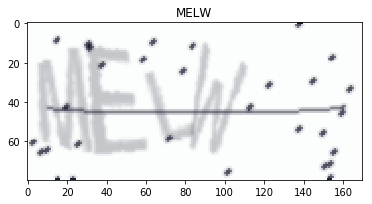

In [44]:
plt.imshow(img)
plt.title(rand_str)

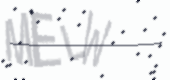

In [45]:
img

In [46]:
def gen(batch_size=32):
    X = np.zeros((batch_size, height, width, 3), dtype=np.uint8)
    y = [np.zeros((batch_size, n_class), dtype=np.uint8) for i in range(n_len)]
    generator = ImageCaptcha(width=width, height=height)
    while True:
        for i in range(batch_size):
            random_str = ''.join([random.choice(characters) for j in range(4)])
            X[i] = generator.generate_image(random_str)
            for j, ch in enumerate(random_str):
                y[j][i, :] = 0
                y[j][i, characters.find(ch)] = 1
        yield X, y

In [68]:
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([characters[x] for x in y])

Text(0.5,1,'83WT')

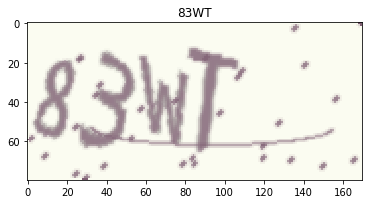

In [51]:
X, y = next(gen(1))
plt.imshow(X[0])
plt.title(decode(y))

In [52]:
from keras.models import *
from keras.layers import *

input_tensor = Input((height, width, 3))
x = input_tensor
for i in range(4):
    x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
    x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(4)]
model = Model(input=input_tensor, output=x)

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

c:\python3_64\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
c:\python3_64\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
c:\python3_64\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
c:\python3_64\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
c:\python3_64\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
c:\python3_64\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
c:\python3_64\

In [53]:
from keras.utils.visualize_util import plot
from IPython.display import Image
 
plot(model, to_file="model.png", show_shapes=True)
Image('model.png')

ModuleNotFoundError: No module named 'keras.utils.visualize_util'

In [54]:
model.fit_generator(gen(), samples_per_epoch=512, nb_epoch=5, 
                     pickle_safe=False, nb_worker=2,
                    validation_data=gen(), nb_val_samples=1280)

c:\python3_64\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python3_64\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., validation_data=<generator..., steps_per_epoch=512, epochs=5, validation_steps=1280, workers=2, use_multiprocessing=False)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/5
512/512 [==============================] - 3199s 6s/step - loss: 62.5947 - c1_loss: 15.6517 - c2_loss: 15.6810 - c3_loss: 15.6279 - c4_loss: 15.6342 - c1_acc: 0.0284 - c2_acc: 0.0266 - c3_acc: 0.0297 - c4_acc: 0.0295 - val_loss: 62.6792 - val_c1_loss: 15.6644 - val_c2_loss: 15.6719 - val_c3_loss: 15.6671 - val_c4_loss: 15.6758 - val_c1_acc: 0.0281 - val_c2_acc: 0.0277 - val_c3_acc: 0.0280 - val_c4_acc: 0.0274
Epoch 2/5
512/512 [==============================] - 5120s 10s/step - loss: 62.6298 - c1_loss: 15.6557 - c2_loss: 15.6636 - c3_loss: 15.6587 - c4_loss: 15.6518 - c1_acc: 0.0287 - c2_acc: 0.0282 - c3_acc: 0.0285 - c4_acc: 0.0289 - val_loss: 62.6803 - val_c1_loss: 15.6475 - val_c2_loss: 15.6766 - val_c3_loss: 15.6723 - val_c4_loss: 15.6841 - val_c1_acc: 0.0292 - val_c2_acc: 0.0274 - val_c3_acc: 0.0277 - val_c4_acc: 0.0269
Epoch 3/5
512/512 [==============================] - 5058s 10s/step - loss: 62.7036 - c1_loss: 15.6734 - c2_loss: 15.6626 - c3_loss: 15.6715 - c4_loss: 1

KBV1


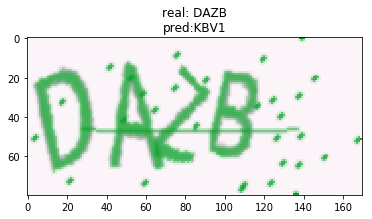

In [83]:
X_test, y_test = next(gen(1))
y_pred = model.predict(X_test)
print(decode(y_pred))
plt.title('real: %s\npred:%s'%(decode(y_test), decode(y_pred)))
plt.imshow(X_test[0], cmap='gray')